In [1]:
import os
import sys
import pathlib
import json
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

dir_preprocessing = os.path.join(str(pathlib.Path().resolve()))
sys.path.append(dir_preprocessing)

import functions as fct
import functions_counties as fct_counties

In [2]:
geo_area = 'eu'
var_input = 'tasmax'

In [3]:
with open(f'config_{geo_area}.json', 'r') as file:
    config_data = json.load(file)

In [4]:
lon = config_data['study_area']['lon']
lat = config_data['study_area']['lat']
months = config_data['study_area']['months']
years = config_data['study_area']['his_years']
nr_years = config_data['study_area']['nr_years']
quantiles = config_data['study_area']['quantiles']
crops_dict = config_data['study_area']['crops_dict']
crops = list(config_data['study_area']['crops_dict'].keys())

In [5]:
#Get all climate models
climate_model_files = fct.get_model_list(config_data, var_input)
climate_models = list(climate_model_files.keys())
print(climate_models)

['FIO-ESM-2-0', 'INM-CM5-0', 'ACCESS-CM2', 'IPSL-CM6A-LR', 'ACCESS-ESM1-5', 'NESM3', 'CanESM5', 'INM-CM4-8', 'GFDL-ESM4', 'MPI-ESM1-2-LR', 'CMCC-ESM2', 'AWI-CM-1-1-MR', 'CIESM', 'EC-Earth3-Veg', 'FGOALS-g3', 'KACE-1-0-G', 'MPI-ESM1-2-HR', 'BCC-CSM2-MR', 'EC-Earth3', 'MIROC6', 'MRI-ESM2-0', 'EC-Earth3-Veg-LR']


In [12]:
#adaptation_months = [0, 1]
adaptation_months = [1]

for nr_months in adaptation_months:
    fct.wrap_delta_frequency(config_data, var_input, nr_months)
    
    data_source = 'delta'
    fct_counties.wrap_cmip_counties(config_data, var_input, data_source, nr_months=nr_months)
    fct_counties.wrap_cmip_crop(config_data, var_input, data_source, nr_months=nr_months)
    
    data_source = 'percentile'
    for percentile in quantiles:
        fct_counties.wrap_cmip_counties(config_data, var_input, data_source, int(percentile*100), nr_months)
        fct_counties.wrap_cmip_crop(config_data, var_input, data_source, int(percentile*100), nr_months)

/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/coding/times.py:724: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/xarray/core/indexing.py:557: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  array = array.get_duck_array()
/Users/car

One model run for a high emission scenario, comparing no adaptation (first plot) and shifting the seasons by 1 month (second plot).

/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/geopandas/geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/geopandas/geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


<AxesSubplot:>

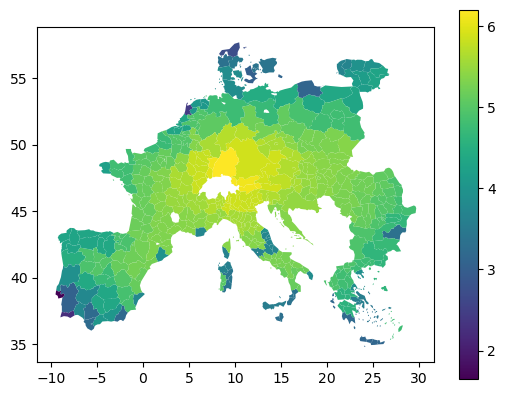

In [10]:
filename = config_data['cmip6_counties']['csv_fut'].format(data_source='delta-'+var_input,
                                                          crop = 'maize',
                                                          nr_months=0)
df = pd.read_csv(filename)
countries_shape = config_data['input']['shape_crop'].format(crop='maize')
shapefile = gpd.read_file(countries_shape)
common_columns = ['State', 'County']
counties_delta = pd.merge(shapefile, df, on=common_columns, how='inner')
example = counties_delta[counties_delta['ssp'] == 'ssp370'][counties_delta['season'] == 'summer'][counties_delta['model'] == 'INM-CM5-0']
example.plot(column='T', legend=True)

/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/geopandas/geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)
/Users/carmenst/micromamba/envs/climada_env_mamba/lib/python3.9/site-packages/geopandas/geodataframe.py:1475: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result = super().__getitem__(key)


<AxesSubplot:>

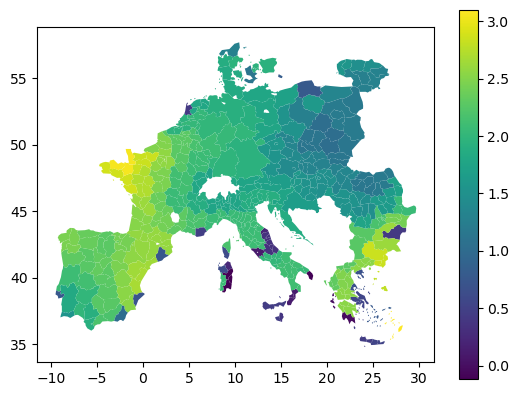

In [13]:
filename = config_data['cmip6_counties']['csv_fut'].format(data_source='delta-'+var_input,
                                                          crop = 'maize',
                                                          nr_months=1)
df = pd.read_csv(filename)
countries_shape = config_data['input']['shape_crop'].format(crop='maize')
shapefile = gpd.read_file(countries_shape)
common_columns = ['State', 'County']
counties_delta = pd.merge(shapefile, df, on=common_columns, how='inner')
example = counties_delta[counties_delta['ssp'] == 'ssp370'][counties_delta['season'] == 'summer'][counties_delta['model'] == 'INM-CM5-0']
example.plot(column='T', legend=True)